In [1]:
# import all libraries

# data manipulation
import pandas as pd
import numpy as np
import networkx as nx

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('data/all.txt',nrows=10000000)

In [3]:
# creating a sample of the first 1m edges
df.to_csv('data/10m.csv',header=False,index=False)

In [5]:
g = nx.read_edgelist('data/10m.csv', delimiter=' ', create_using=nx.DiGraph(),nodetype=int)

#printing the information of graph
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 2350544
Number of edges: 10000000
Average in degree:   4.2543
Average out degree:   4.2543


In [12]:
# get subgraph
sub = g.subgraph([338719101, 243202554, 121139770, 343756158, 475061917, 293776216])

In [13]:
list(sub.edges)

[]

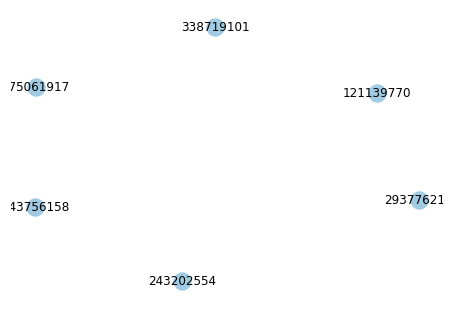

In [14]:
#plotting the graph
# df = pd.read_csv('links.txt',skiprows=0, nrows=10).to_csv('data/sample.csv',header=False,index=False)
# subgraph = nx.read_edgelist('data/sample.csv', delimiter=' ', create_using=nx.DiGraph(),nodetype=int)
pos=nx.spring_layout(sub)
nx.draw(sub,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("results/als_result_graph.pdf")

In [84]:
in_subgraph = g.in_edges([876217596, 806950262, 256475718])
out_subgraph = g.out_edges([876217596, 806950262, 256475718])

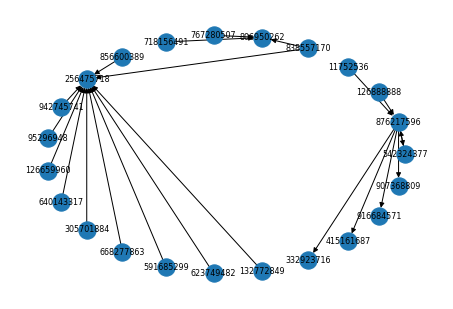

In [110]:
subgraph = nx.DiGraph()
subgraph.add_edges_from(in_subgraph)
subgraph.add_edges_from(out_subgraph)
# pos=nx.spring_layout(subgraph)
nx.draw_circular(subgraph,with_labels=True, font_size=8)
plt.savefig("results/als_result_graph.pdf")

Text(0,0.5,'No of Followees')

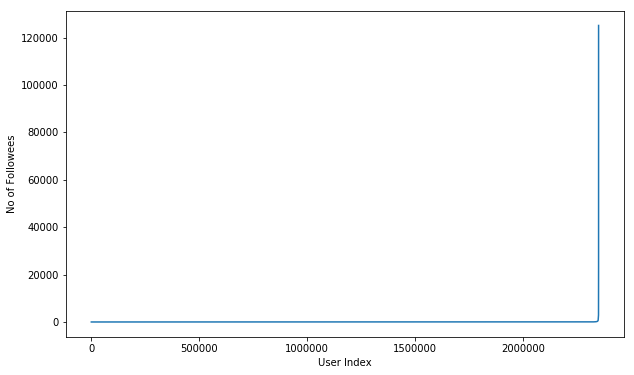

In [94]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(outdegree_dist)
plt.xlabel("User Index")
plt.ylabel("No of Followees")

In [90]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 1.0
98 percentile value is 7.0
99 percentile value is 45.0
100 percentile value is 125123.0
99.1 percentile value is 54.0
99.2 percentile value is 65.0
99.3 percentile value is 78.0
99.4 percentile value is 96.0
99.5 percentile value is 121.0
99.6 percentile value is 157.0
99.7 percentile value is 216.0
99.8 percentile value is 333.0
99.9 percentile value is 668.4570000004023
100.0 percentile value is 125123.0


Text(0,0.5,'No of Followers')

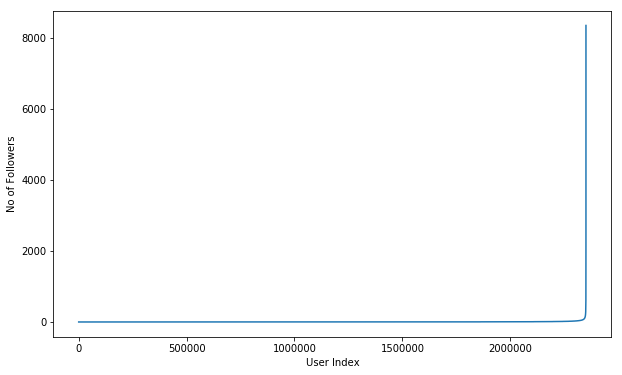

In [91]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(indegree_dist)
plt.xlabel("User Index")
plt.ylabel("No of Followers")

In [92]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

90 percentile value is 8.0
91 percentile value is 9.0
92 percentile value is 10.0
93 percentile value is 11.0
94 percentile value is 12.0
95 percentile value is 14.0
96 percentile value is 17.0
97 percentile value is 21.0
98 percentile value is 29.0
99 percentile value is 46.0
100 percentile value is 8344.0
99.1 percentile value is 50.0
99.2 percentile value is 53.0
99.3 percentile value is 58.0
99.4 percentile value is 64.0
99.5 percentile value is 72.0
99.6 percentile value is 83.0
99.7 percentile value is 98.0
99.8 percentile value is 126.0
99.9 percentile value is 192.0
100.0 percentile value is 8344.0
